# Análisis Exploratorio de Datos. 
## dataset: default of credit card clients

### Se realiza análisis exploratorio de datos, cuyos atributos principales
### se analizan a continuación, para facilitar el manejo de los atributos continuos se utilizó la clase de
### Information Value en R, para escoger la cantindad de divisiones que optimizara estos datos. Se seleccionaron 
### 5 divisiones para los atributos age, education, bill_ATM, pay_ATM, y Bal_limit.



# Importa Librerias

In [1]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from matplotlib import pylab
from pylab import *

%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)


# Leyendo Data Set usando Pandas

In [2]:
credit = pd.read_csv('default of credit card clients.csv', header =1) # dataset original
credit_bins = pd.read_csv('credit_bins.csv', header =0)# dataset con divisiones en las variables continuas
credit2 = pd.read_csv('credit_bins_total.csv', header =0) # dataset con todas las variables_ continuas y nuevas categóricas.
compIV =pd.read_csv('compIV.csv', header =0) ### importación de los valores Information value para los atributos continuos.

# Analisis

In [3]:
# Credit head
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Visibilidando las categorias creadas sobre los atributos continuos, usando el bloque "information" de R. 

credit_bins.head()

,ID,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_ATM3_bins,BILL_ATM4_bins,BILL_ATM5_bins,BILL_ATM6_bins,PAY_AMT1_bins,PAY_AMT2_bins,PAY_AMT3_bins,PAY_AMT4_bins,PAY_AMT5_bins,PAY_AMT6_bins
0,1,female,university,married,2,2,-1,-1,-2,-2,...,-157264_1187,-170000_988,-81334_763,-339906_476,0_316,269_1600,0_2,0_1000,0_1000,0_1000
1,2,female,university,single,-1,2,0,0,0,2,...,1188_12193,989_11145,764_9808,477_8769,0_316,269_1600,3_1206,0_1000,0_1000,1001_2100
2,3,female,university,single,0,0,0,0,0,0,...,12194_31401,11146_28604,9809_26690,8770_25506,317_1724,269_1600,3_1206,0_1000,0_1000,2101_5000
3,4,female,university,married,0,0,0,0,0,0,...,31402_76777,11146_28604,26691_65820,25507_63150,1725_3000,1601_3000,3_1206,1001_2100,1001_2123,0_1000
4,5,male,university,married,-1,0,-1,0,0,0,...,31402_76777,11146_28604,9809_26690,8770_25506,1725_3000,6001_1684259,5284_896040,5001_621000,0_1000,0_1000


In [5]:
# En este dataset se ven los atributos que aportan mayor cantidad de Information value. Se escoge finalmente 5 divisiones pues
# la diferencia es mínima. 

# En importancia los atributos que dan mayor information.
print(compIV)

   Variable_10div IV_10div Variable_5div IV_5div Variable_3div IV_3div
0           PAY_0   0,8772         PAY_0  0,8772         PAY_0  0,8772
1           PAY_2   0,5488         PAY_2  0,5488         PAY_2  0,5488
2           PAY_3    0,416         PAY_3   0,416         PAY_3   0,416
3           PAY_4   0,3673         PAY_4  0,3673         PAY_4  0,3673
4           PAY_5   0,3402         PAY_5  0,3402         PAY_5  0,3402
5           PAY_6   0,2933         PAY_6  0,2933         PAY_6  0,2933
6       LIMIT_BAL   0,1752     LIMIT_BAL  0,1688     LIMIT_BAL   0,147
7        PAY_AMT1   0,1624      PAY_AMT1  0,1555      PAY_AMT1  0,1247
8        PAY_AMT2   0,1461      PAY_AMT2  0,1366      PAY_AMT2  0,1111
9        PAY_AMT3   0,1242      PAY_AMT3   0,117      PAY_AMT3  0,0934
10       PAY_AMT4   0,0909      PAY_AMT4  0,0845      PAY_AMT4  0,0806
11       PAY_AMT6   0,0906      PAY_AMT6  0,0843      PAY_AMT6  0,0785
12       PAY_AMT5   0,0816      PAY_AMT5  0,0726      PAY_AMT5  0,0695
13    

In [6]:
# Nombres de las columnas
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# # Nombres de las columnas del dataset dividido categoricamente.
credit_bins.columns

Index(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default_payment_next_month',
       'LIMIT_BAL_bins', 'LIMIT_AGE_bins', 'BILL_ATM1_bins', 'BILL_ATM2_bins',
       'BILL_ATM3_bins', 'BILL_ATM4_bins', 'BILL_ATM5_bins', 'BILL_ATM6_bins',
       'PAY_AMT1_bins', 'PAY_AMT2_bins', 'PAY_AMT3_bins', 'PAY_AMT4_bins',
       'PAY_AMT5_bins', 'PAY_AMT6_bins'],
      dtype='object')

In [8]:
#Mapeando la categoría "otros"

size_mapping = {'male': 1,'female': 2}

inv_size_mapping = {v: k for k, v in size_mapping.items()}


education_mapping = {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others', 4 : 'others',
                   5 : 'others', 6 : 'others' }

marital_status_mapping = {1 : 'married', 2 : 'single', 3 : 'divorce',0 : 'others'}

default_mapping = {0 : 'false', 1 : 'true'}






credit2=credit
credit2["SEX"]=credit['SEX'].map(inv_size_mapping)
credit2["EDUCATION"]=credit['EDUCATION'].map(education_mapping)
credit2["MARRIAGE"]=credit['MARRIAGE'].map(marital_status_mapping)
credit2["default payment next month"]=credit["default payment next month"].map(default_mapping)

In [9]:
## Número de usuarios por sexo
credit.groupby('SEX')['SEX'].count()

SEX
female    18112
male      11888
Name: SEX, dtype: int64

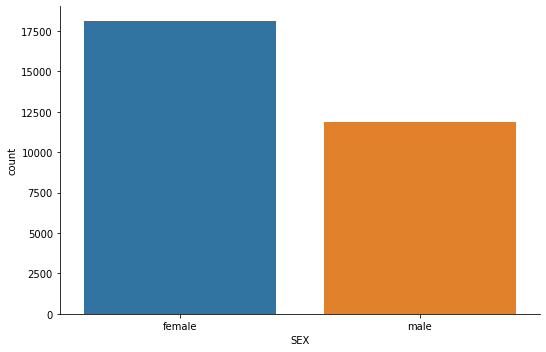

In [10]:
# Número de usuarios por sexo
fg = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

In [11]:
# Número de usuarios por educación
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
graduate school    10585
high school         4917
others               468
university         14030
Name: EDUCATION, dtype: int64

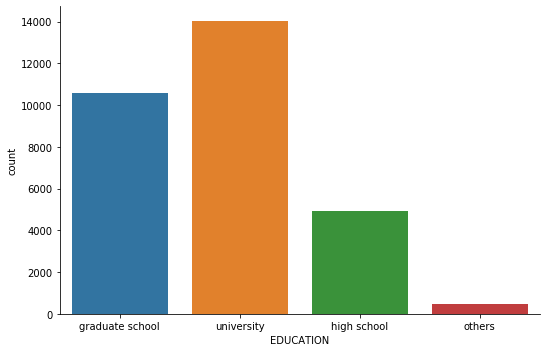

In [12]:
#  Número de usuarios por educación
fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5,order=["graduate school","university","high school","others"])
fg.set_xlabels('EDUCATION')

In [13]:
# Número de usuarios edad
credit_bins.groupby('LIMIT_AGE_bins')['LIMIT_AGE_bins'].count()

LIMIT_AGE_bins
21_27    6604
28_30    4409
31_37    7945
38_43    5056
44_79    5986
Name: LIMIT_AGE_bins, dtype: int64

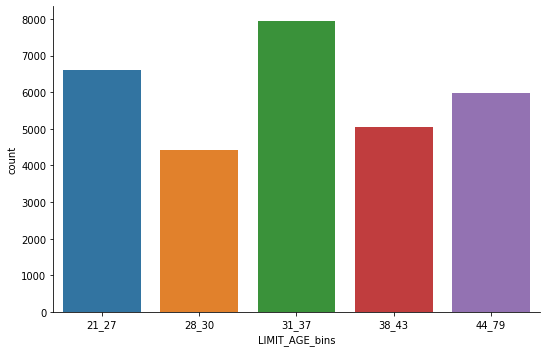

In [14]:
#Usuarios por edad, dividido en 5 categorías.
fg = sns.catplot('LIMIT_AGE_bins', data=credit_bins, kind='count', aspect=1.5)
fg.set_xlabels('LIMIT_AGE_bins')

In [15]:
# Numero de mujeres y hombres por grado educativo
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX     EDUCATION      
female  graduate school    6231
        high school        2927
        others              298
        university         8656
male    graduate school    4354
        high school        1990
        others              170
        university         5374
Name: SEX, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


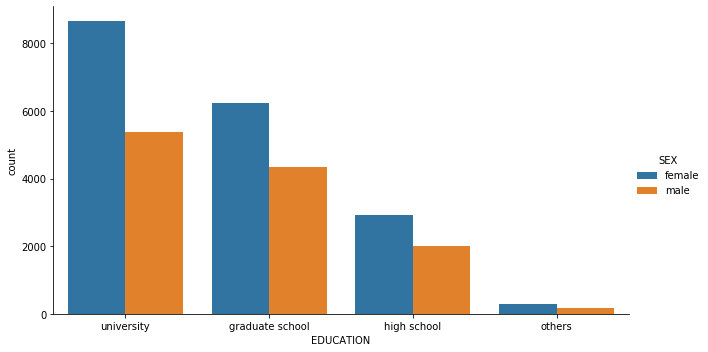

In [16]:
# Again use saeborn to group by Sex and education
g = sns.factorplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

In [17]:
# Numero de clientes que entran a default el próximo mes
credit_bins.groupby(['default_payment_next_month'])['default_payment_next_month'].count()

default_payment_next_month
0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [18]:
# Numero de usuarios que están por entrar en default el próximo mes dividido por sexo y educación
credit_bins.pivot_table('default_payment_next_month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,graduate school,high school,others,university,All
SEX,,,,,
female,1130,692,19,1922,3763
male,906,545,14,1408,2873
All,2036,1237,33,3330,6636


In [19]:
# Numero de usuarios que están por entrar en default el próximo mes dividido por rango de edad y educación
credit_bins.pivot_table('default_payment_next_month', 'LIMIT_AGE_bins', 'EDUCATION', aggfunc=np.sum, margins=True)


EDUCATION,graduate school,high school,others,university,All
LIMIT_AGE_bins,,,,,
21_27,451,194,6,947,1598
28_30,348,99,3,423,873
31_37,600,209,5,795,1609
38_43,324,231,7,538,1100
44_79,313,504,12,627,1456
All,2036,1237,33,3330,6636


In [20]:
# Numero de usuarios que están por entrar en default el próximo mes dividido por rango de edad y limite de crédito
credit_bins.pivot_table('default_payment_next_month', 'LIMIT_AGE_bins', 'LIMIT_BAL_bins', aggfunc=np.sum, margins=True)


LIMIT_BAL_bins,100001_180000,10000_50000,180001_270000,270001_1000000,50001_100000,All
LIMIT_AGE_bins,,,,,,
21_27,216,899,83,51,349,1598
28_30,210,227,144,107,185,873
31_37,346,426,299,258,280,1609
38_43,210,326,187,191,186,1100
44_79,234,562,201,215,244,1456
All,1216,2440,914,822,1244,6636


In [21]:
#Usuarios que no están en default 
not_default = credit_bins[credit_bins['default_payment_next_month']==0]

In [22]:
#Cantidad de usuarios no en default
len(not_default)

23364

In [23]:
# Cantidad de usuarios no en default por sexo y educación
not_default.pivot_table('default_payment_next_month', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,graduate school,high school,others,university,All
SEX,,,,,
female,5101,2235,279,6734,14349
male,3448,1445,156,3966,9015
All,8549,3680,435,10700,23364


In [24]:
# Cantidad de usuarios no en default por edad y educación
not_default.pivot_table('default_payment_next_month', 'LIMIT_AGE_bins', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,graduate school,high school,others,university,All
LIMIT_AGE_bins,,,,,
21_27,1806,494,94,2612,5006
28_30,1699,294,57,1486,3536
31_37,2609,694,113,2920,6336
38_43,1267,752,70,1867,3956
44_79,1168,1446,101,1815,4530
All,8549,3680,435,10700,23364


In [25]:
# Cantidad de usuarios no en default por edad y por límite de crédito
not_default.pivot_table('default_payment_next_month', 'LIMIT_AGE_bins', 'LIMIT_BAL_bins', aggfunc=len, margins=True)


LIMIT_BAL_bins,100001_180000,10000_50000,180001_270000,270001_1000000,50001_100000,All
LIMIT_AGE_bins,,,,,,
21_27,1042,1995,493,370,1106,5006
28_30,893,503,818,792,530,3536
31_37,1356,895,1499,1813,773,6336
38_43,817,673,891,1057,518,3956
44_79,799,1170,806,1104,651,4530
All,4907,5236,4507,5136,3578,23364


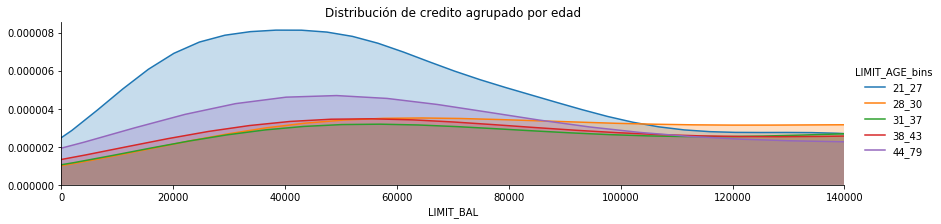

In [26]:
credit2 = pd.read_csv('credit_bins_total.csv', header =0)
fig = sns.FacetGrid(credit2, hue='LIMIT_AGE_bins', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit2['LIMIT_BAL'].median()
fig.set(xlim=(0,oldest))
fig.set(title='Distribución de credito agrupado por edad')
fig.add_legend()


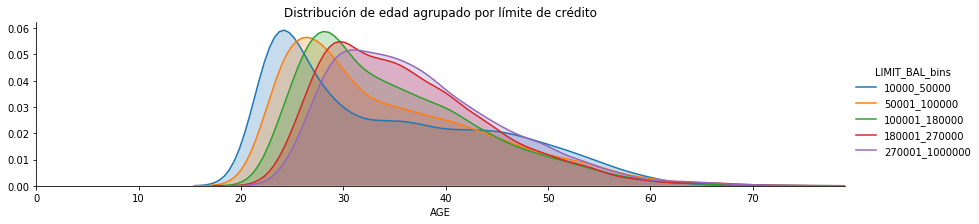

In [27]:
fig = sns.FacetGrid(credit2, hue='LIMIT_BAL_bins', aspect=4,hue_order=["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"])
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit2['AGE'].max()
fig.set(title='Distribución de edad agrupado por límite de crédito')
fig.set(xlim=(0,oldest))
fig.add_legend()

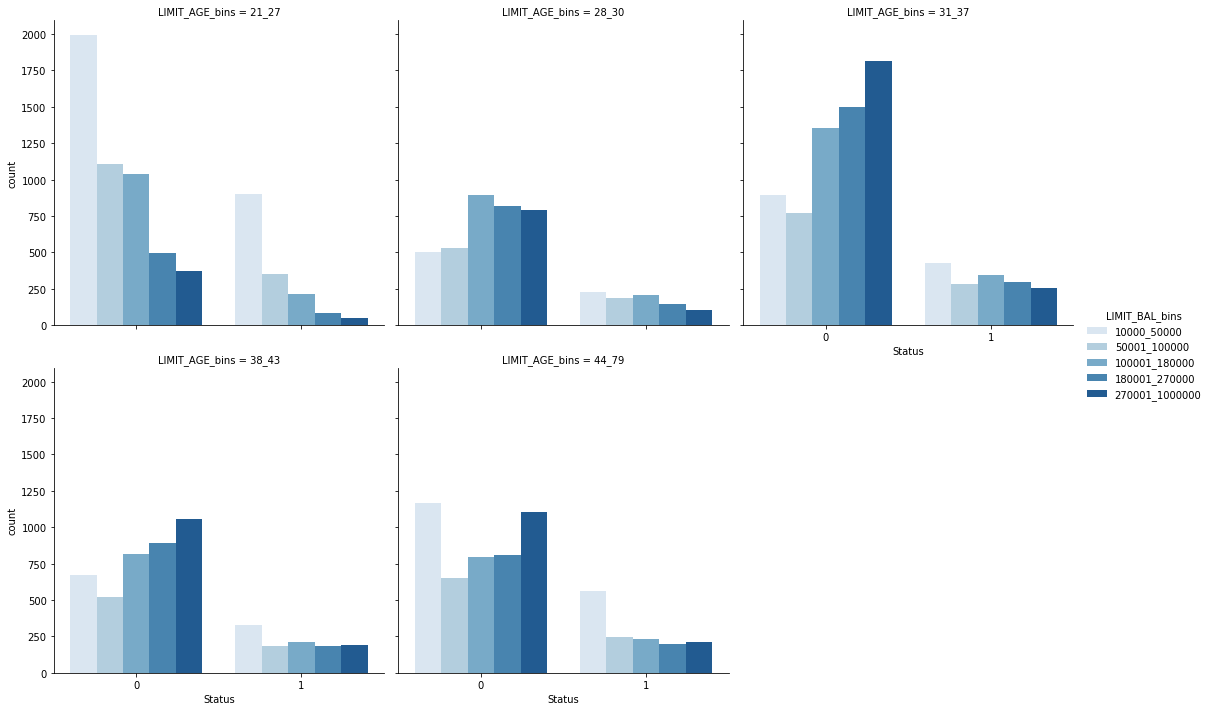

In [28]:
fg=sns.factorplot('default_payment_next_month', data=credit_bins, kind='count', hue='LIMIT_BAL_bins', col='LIMIT_AGE_bins',hue_order= ["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"],
                 palette='Blues',col_wrap=3)
fg.set_xlabels('Status')
#Se identifica los grupos de crédito donde la probabilidad de estar en default es practicamente 2 a 1 en cada grupo de edad, siendo
#el grupo de 21-27 años donde se concentran la mayoría de los casos, SE tiene a su vez que este grupo de credito es el de mayor probabilidad de
#impago, se nota también que el grupo de 28-30 es donde hay menos casos acumulados de impago

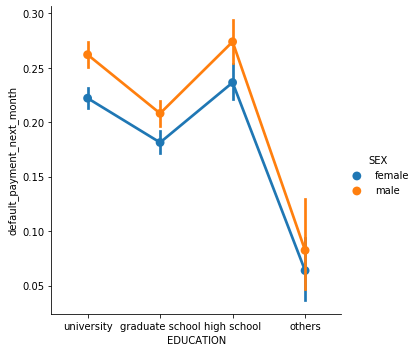

In [29]:
#Entra en default contra educación y género, la probabilidad se mantiente de 0.17 a 0.27, sólo la categoría otros mantiene menor probabilidad pero con alta variabilidad
sns.factorplot('EDUCATION','default_payment_next_month', hue='SEX', data=credit_bins, 
               hue_order = ['female','male'])

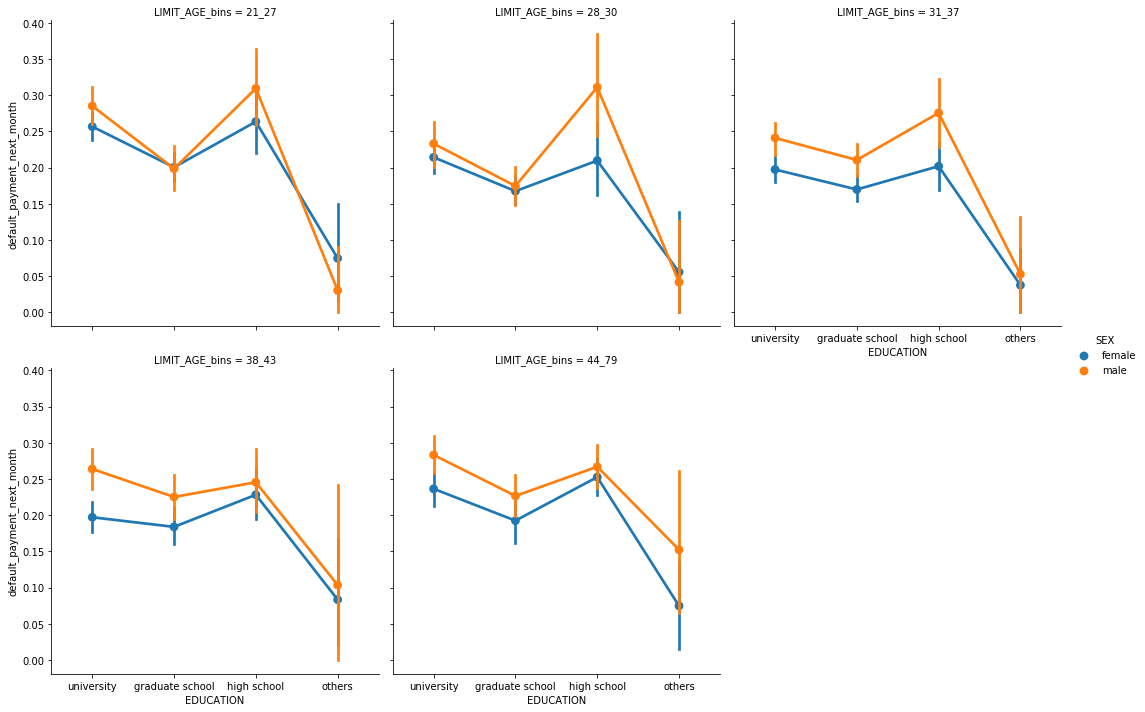

In [30]:
#Entra en default contra educación y edad
#Solamente en la categoría "otros" se nota la probabilidad cercana a cero, sin importar la edad existe una probabilidad de 0.2 a 0.3

# no existe mucha variabilidad, salvo la categória "otros"
sns.factorplot('EDUCATION','default_payment_next_month', hue='SEX', data=credit_bins, 
               hue_order = ['female','male'],col='LIMIT_AGE_bins', col_wrap=3)

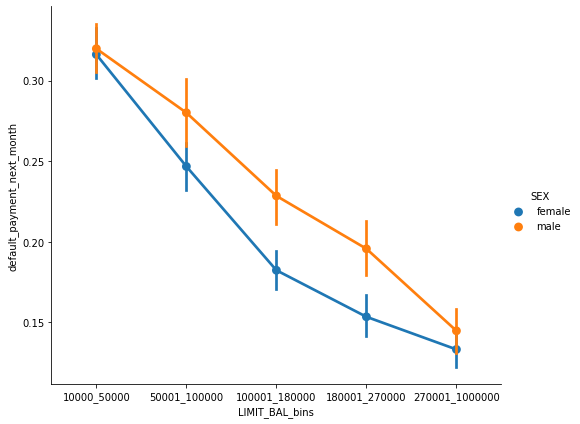

In [31]:
#Entra en default contra educación y género, la probabilidad siendo mujer es levemente mayor de entrar en impago, sin embargo se
#nota que conforme aumenta el límite de crédito al probabilidad de impago se reduce a 0.
sns.factorplot('LIMIT_BAL_bins','default_payment_next_month', hue='SEX', data=credit_bins, height=6, aspect=1.2,
               hue_order = ['female','male'],order=["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"])

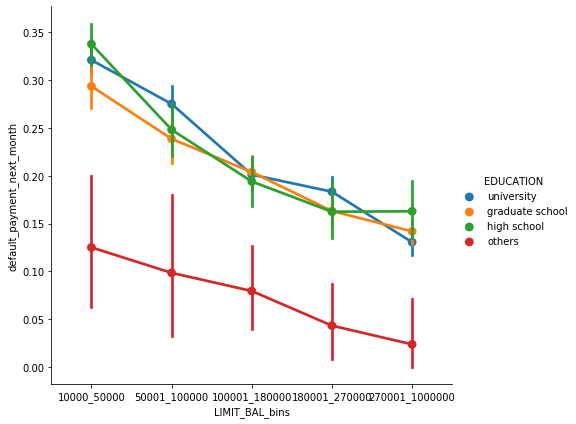

In [32]:
#Entra en default contra educación y género
# se analiza entonces educación, y se nota que existe la misma tendencia independientemente del grado escolar.
sns.factorplot('LIMIT_BAL_bins','default_payment_next_month', hue='EDUCATION', data=credit_bins, height=6, aspect=1.1,
            order=["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"])

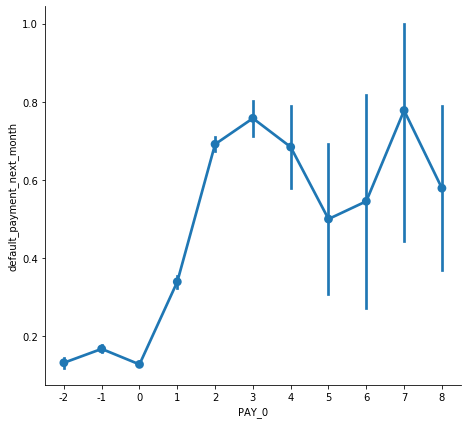

In [33]:
# Survived vs. Age gruped by class
#Entra en default contra educación y género
sns.factorplot('PAY_0','default_payment_next_month', data=credit_bins, height=6, aspect=1.1)
#Se nota que la variabilidad como la probabilidad de impago aumenta conforme aumenta la cantidad de meses en mora.
#Los valores -2,-1 y 0 mantienen probabilidad menor a 0.2. Durante este mes de pago. Se repite en los demás meses en mora.

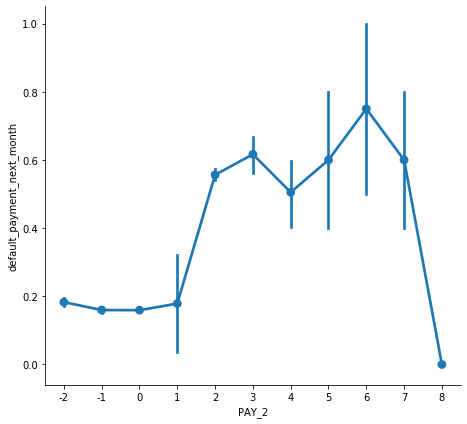

In [34]:

#Entra en default contra categória de pago en el mes anterior, se muestra la tendencia anterior.
sns.factorplot('PAY_2','default_payment_next_month', data=credit_bins, height=6, aspect=1.1)

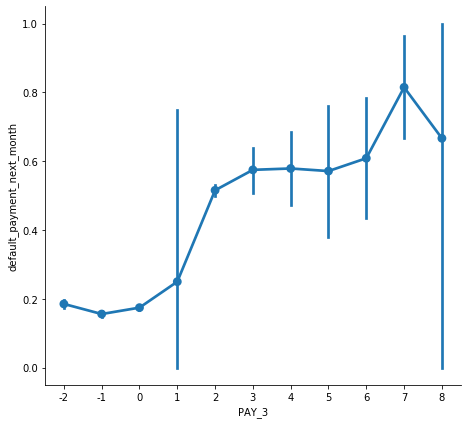

In [35]:
#Entra en default contra categória de pago en el mes trasanterior.
sns.factorplot('PAY_3','default_payment_next_month', data=credit_bins, height=6, aspect=1.1)

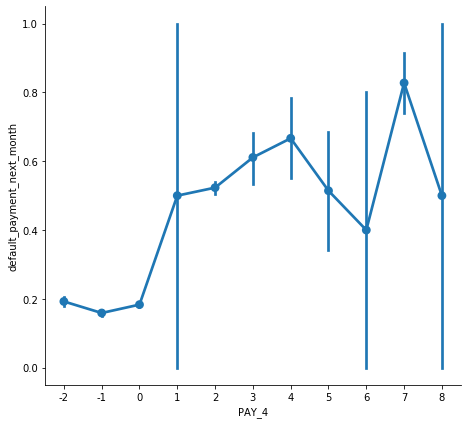

In [36]:
#Entra en default contra categória de pago en el mes 4 anterior.
sns.factorplot('PAY_4','default_payment_next_month', data=credit_bins, height=6, aspect=1.1)

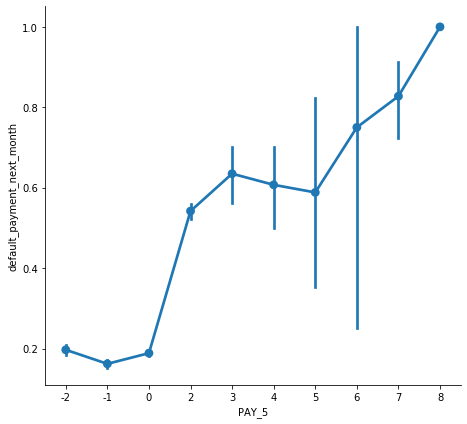

In [37]:
#Entra en default contra categória de pago en el mes 5 anterior.
sns.factorplot('PAY_5','default_payment_next_month', data=credit_bins, height=6, aspect=1.1)

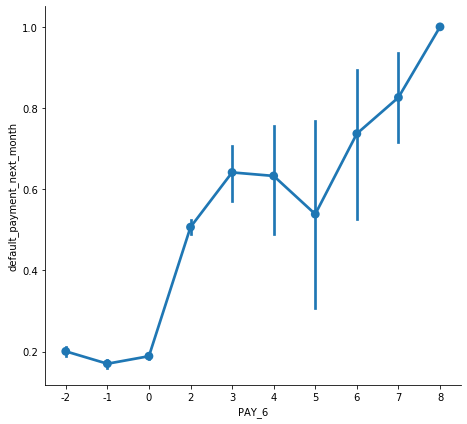

In [38]:
#Entra en default contra categória de pago en el mes 6 anterior.
sns.factorplot('PAY_6','default_payment_next_month', data=credit_bins, height=6, aspect=1.1)

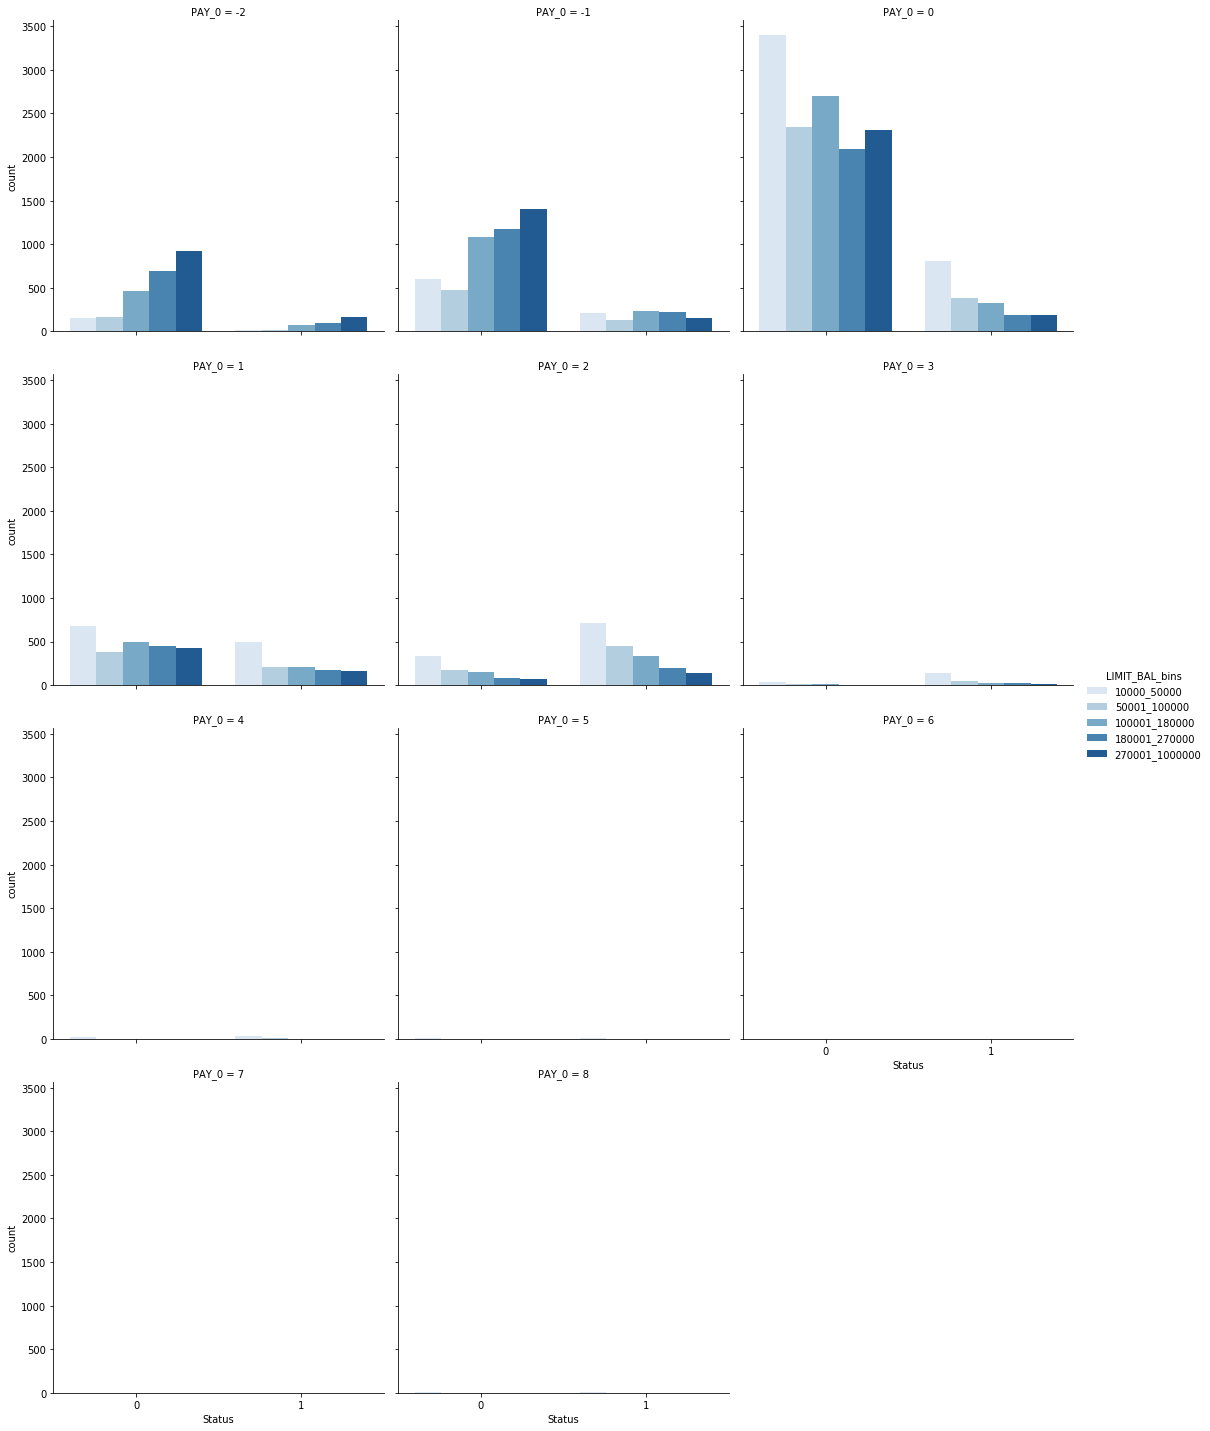

In [40]:
fg=sns.factorplot('default_payment_next_month', data=credit_bins, kind='count', hue='LIMIT_BAL_bins', col='PAY_0',hue_order= ["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"],
                 palette='Blues',col_wrap=3)
fg.set_xlabels('Status')
#Se identifica los grupos de crédito donde la mayor cantidad de usuarios que van entrar en default en cada estado es el grupo
# de 10000-50000. Donde se incrementa la cantidad cuando el estado es al día=0, y aumenta cuando se empieza acumular 1 o 2 meses de mora.
#en el último mes.

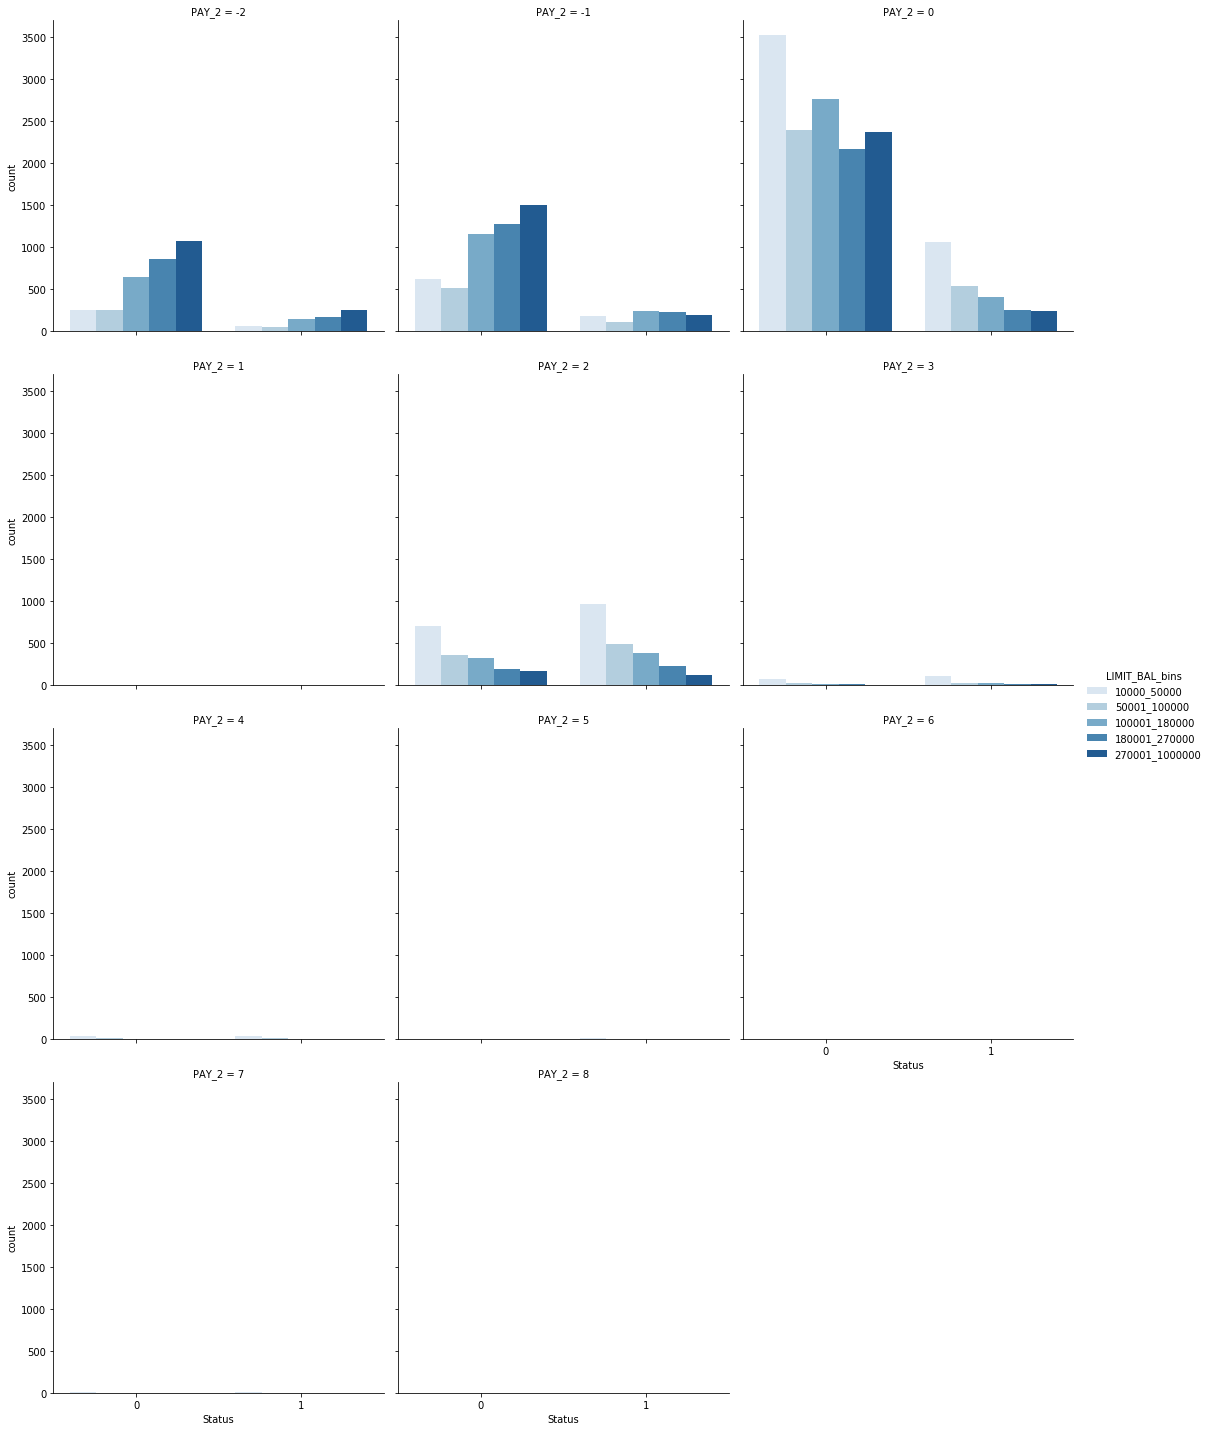

In [41]:
fg=sns.factorplot('default_payment_next_month', data=credit_bins, kind='count', hue='LIMIT_BAL_bins', col='PAY_2',hue_order= ["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"],
                 palette='Blues',col_wrap=3)
fg.set_xlabels('Status')
#Se identifica los grupos de crédito donde la mayor cantidad de usuarios que van entrar en default en cada estado es el grupo
# de 10000-50000. Donde se incrementa la cantidad cuando el estado es al día=0, y aumenta cuando se empieza acumular 1 o 2 meses de mora.
#en el mes anterior.

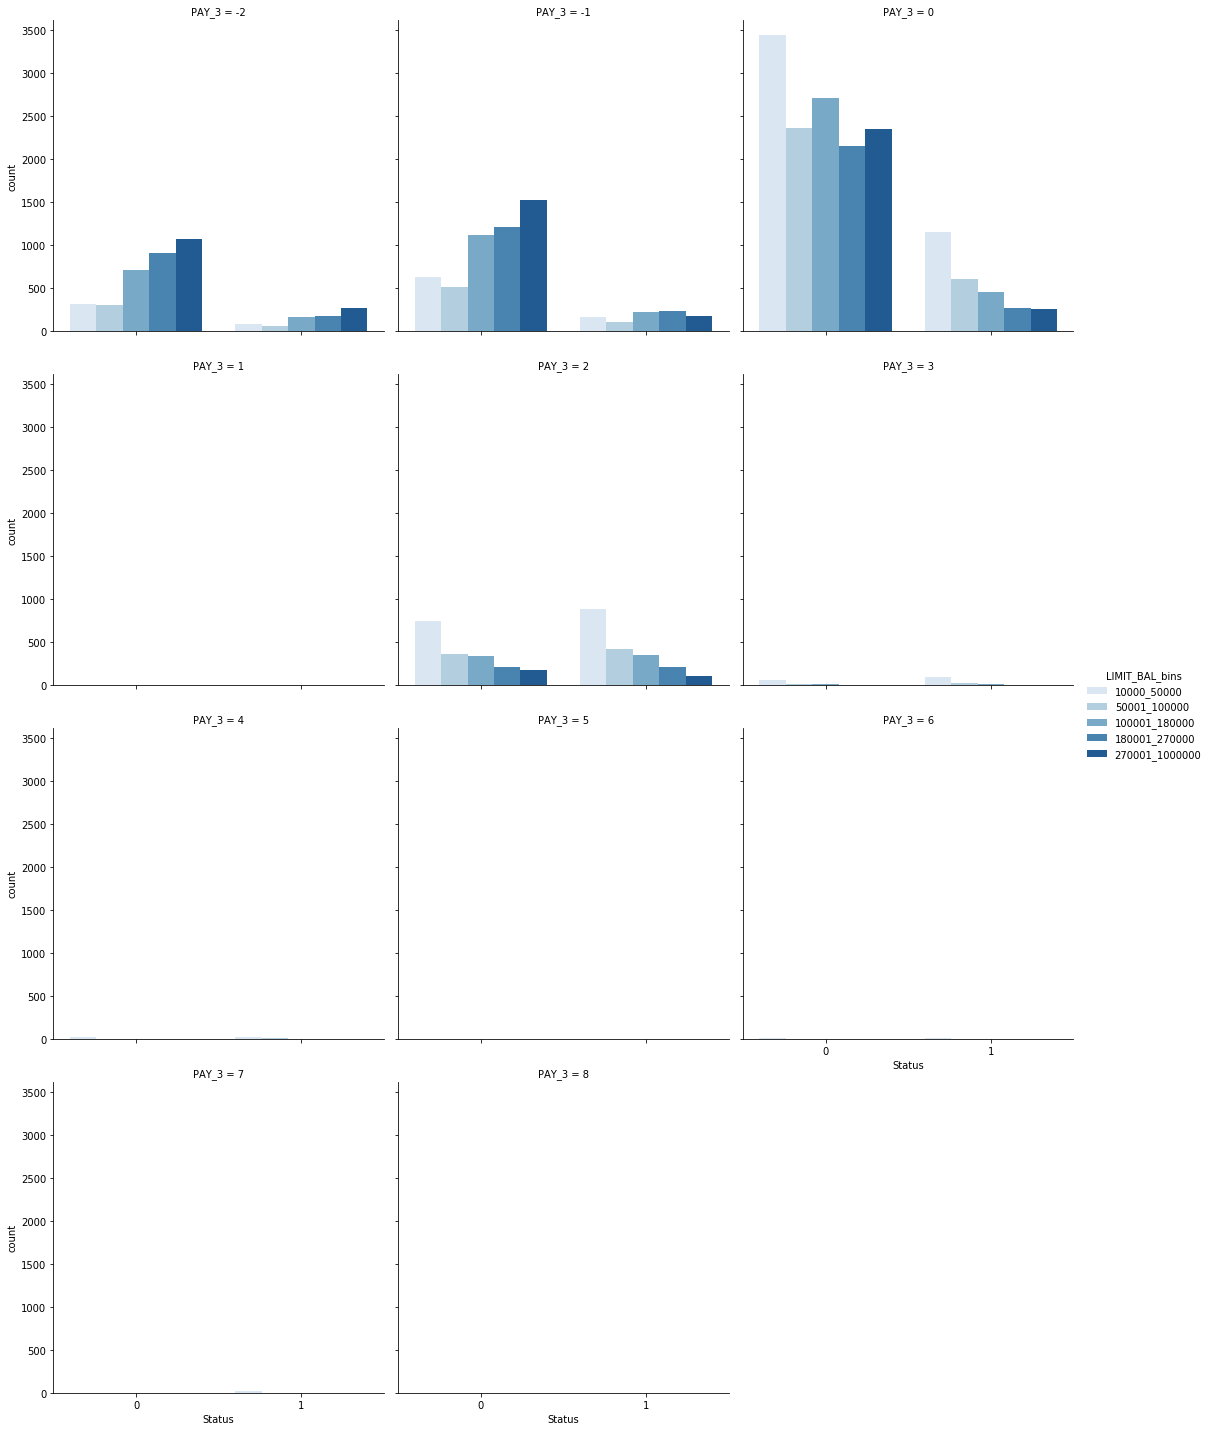

In [42]:
fg=sns.factorplot('default_payment_next_month', data=credit_bins, kind='count', hue='LIMIT_BAL_bins', col='PAY_3',hue_order= ["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"],
                 palette='Blues',col_wrap=3)
fg.set_xlabels('Status')
#Se identifica los grupos de crédito donde la mayor cantidad de usuarios que van entrar en default en cada estado es el grupo
# de 10000-50000. Donde se incrementa la cantidad cuando el estado es al día=0, y aumenta cuando se empieza acumular 1 o 2 meses de mora.
#en el mes trasanterior.

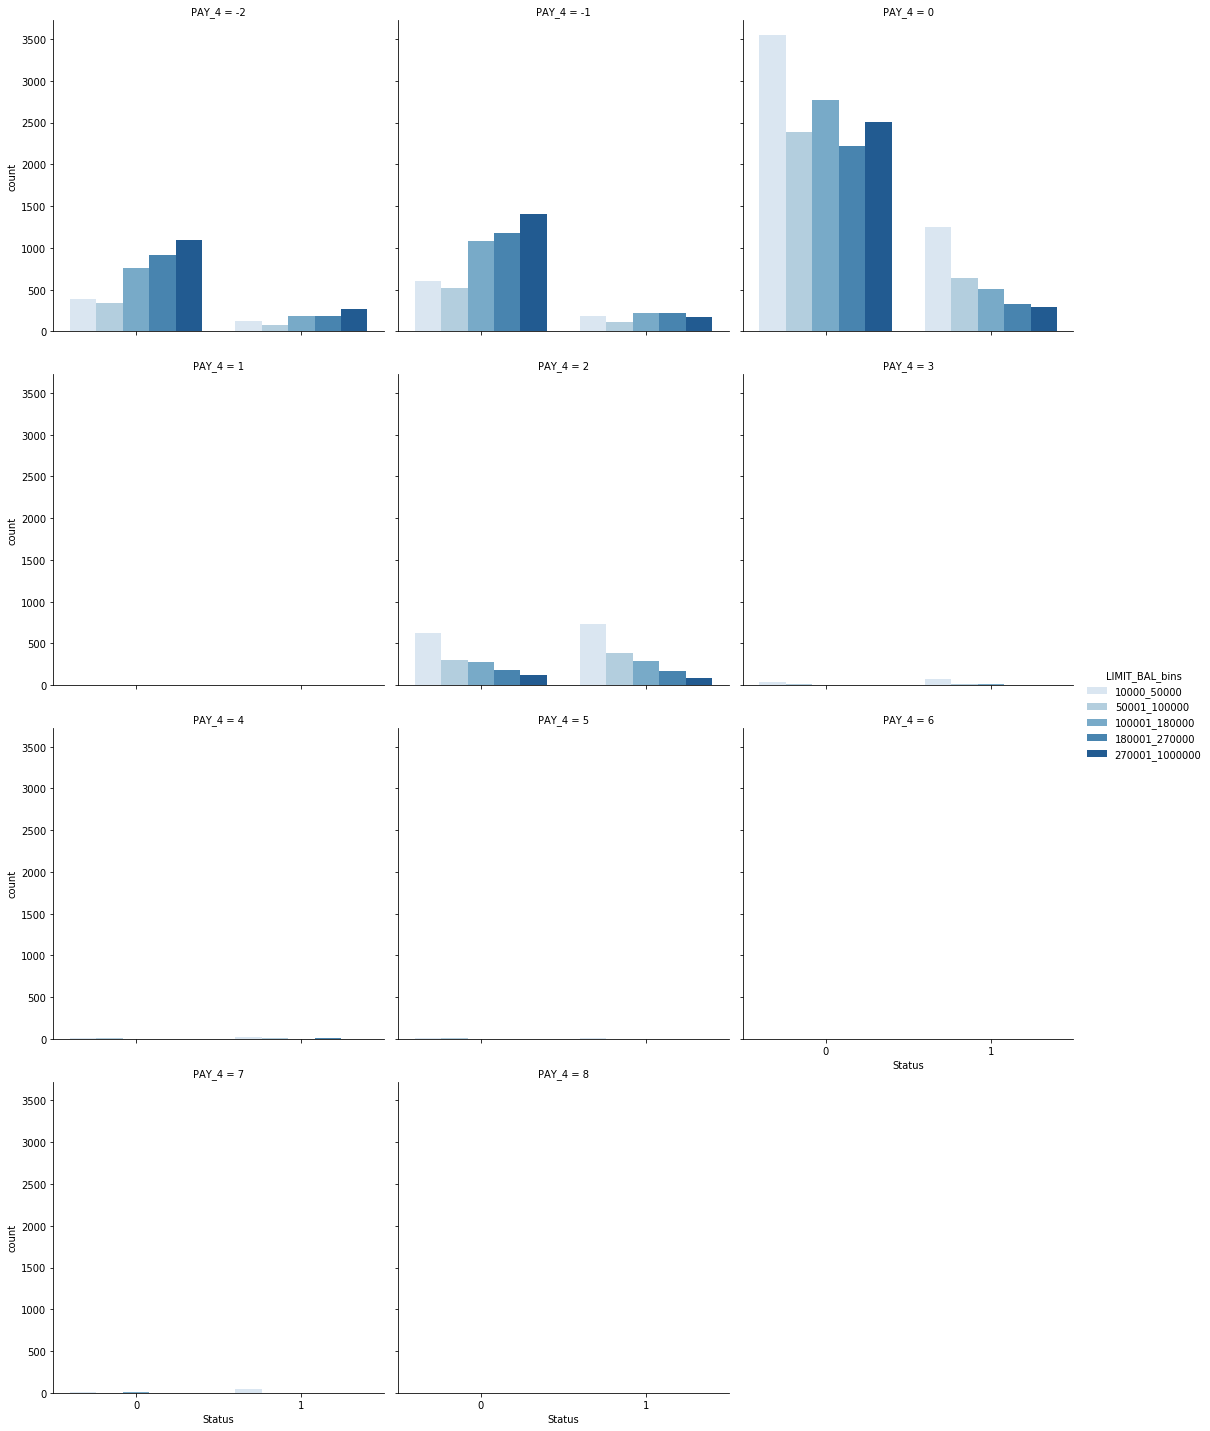

In [43]:
fg=sns.factorplot('default_payment_next_month', data=credit_bins, kind='count', hue='LIMIT_BAL_bins', col='PAY_4',hue_order= ["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"],
                 palette='Blues',col_wrap=3)
fg.set_xlabels('Status')
##Se identifica los grupos de crédito donde la mayor cantidad de usuarios que van entrar en default en cada estado es el grupo
# de 10000-50000. Donde se incrementa la cantidad cuando el estado es al día=0, y aumenta cuando se empieza acumular 1 o 2 meses de mora.
#en el mes 4 anterior.

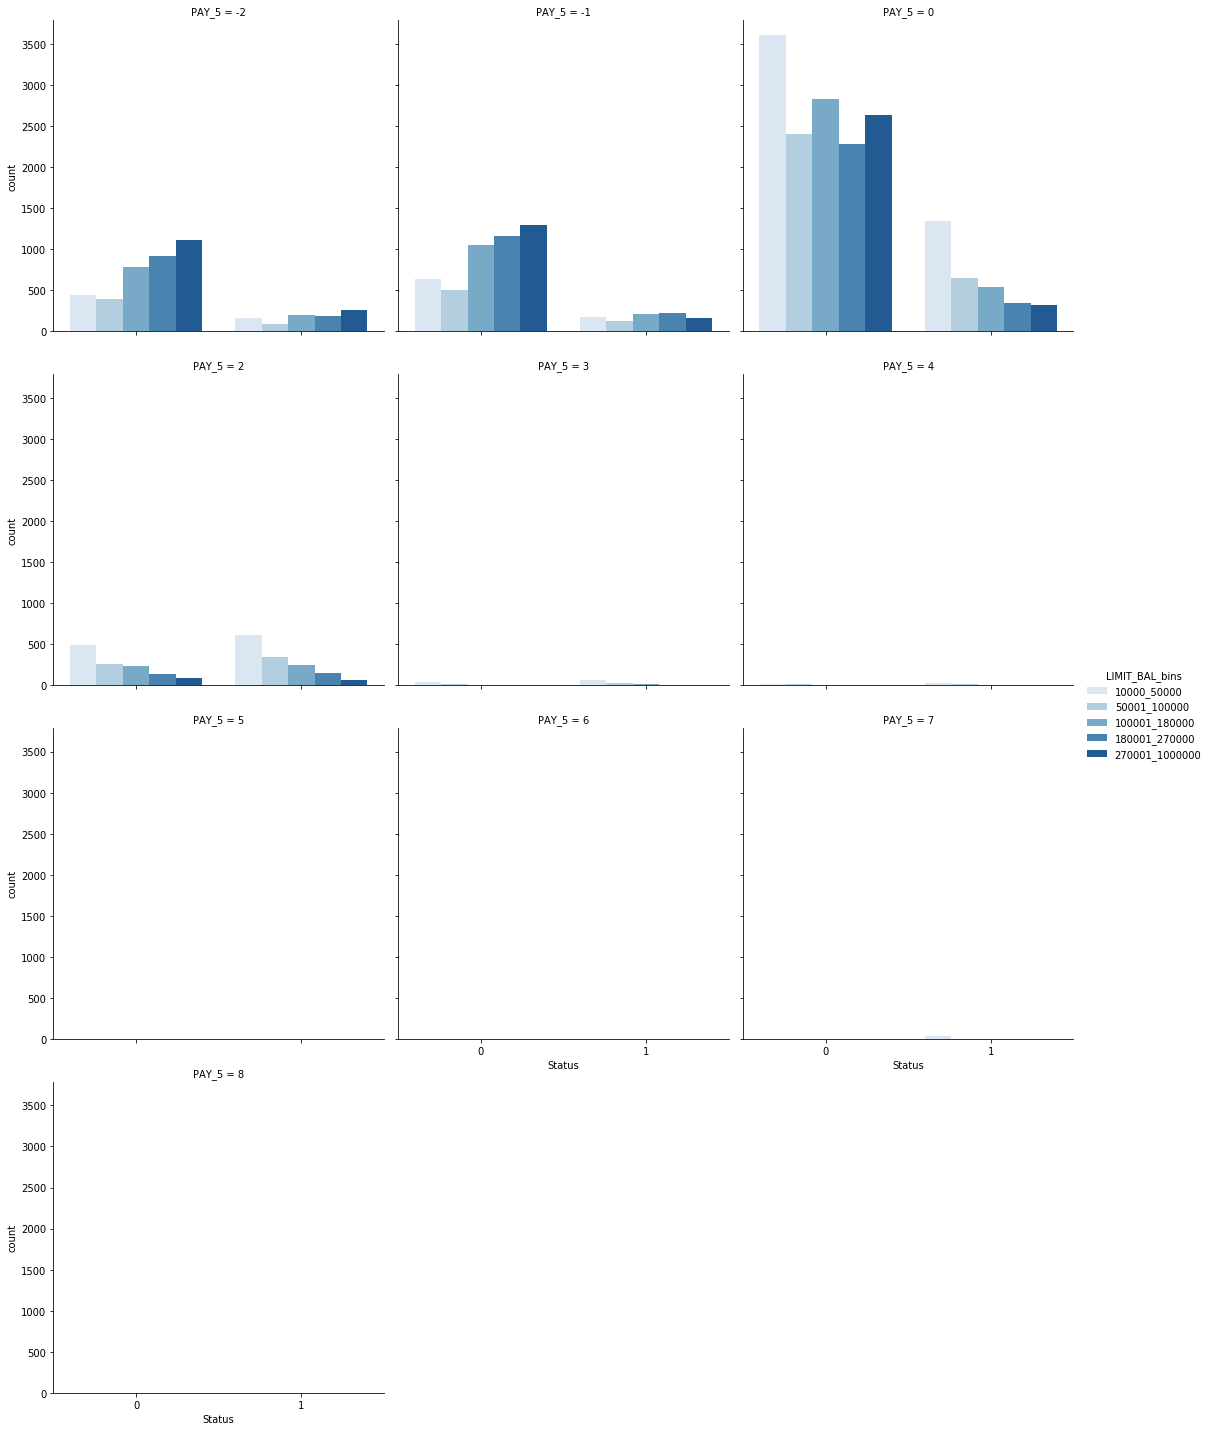

In [44]:
fg=sns.factorplot('default_payment_next_month', data=credit_bins, kind='count', hue='LIMIT_BAL_bins', col='PAY_5',hue_order= ["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"],
                 palette='Blues',col_wrap=3)
fg.set_xlabels('Status')
##Se identifica los grupos de crédito donde la mayor cantidad de usuarios que van entrar en default en cada estado es el grupo
# de 10000-50000. Donde se incrementa la cantidad cuando el estado es al día=0, y aumenta cuando se empieza acumular 1 o 2 meses de mora.
#en el mes 5 anterior.

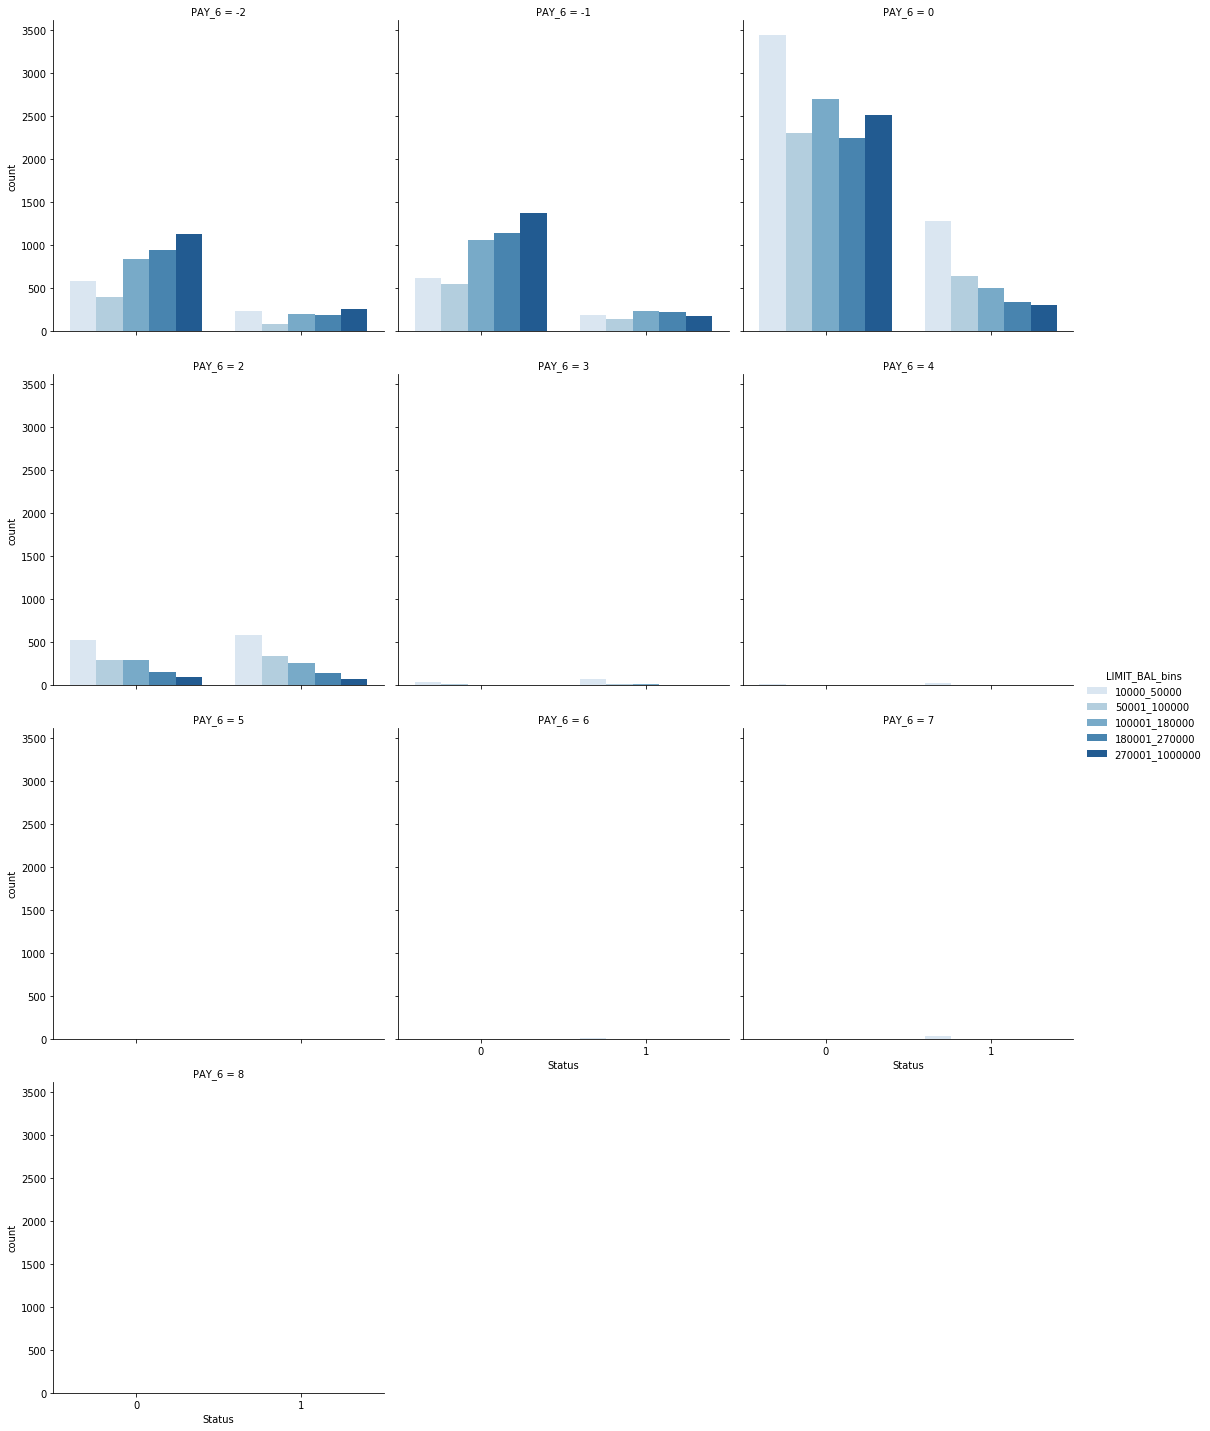

In [45]:
fg=sns.factorplot('default_payment_next_month', data=credit_bins, kind='count', hue='LIMIT_BAL_bins', col='PAY_6',hue_order= ["10000_50000","50001_100000","100001_180000","180001_270000","270001_1000000"],
                 palette='Blues',col_wrap=3)
fg.set_xlabels('Status')
##Se identifica los grupos de crédito donde la mayor cantidad de usuarios que van entrar en default en cada estado es el grupo
# de 10000-50000. Donde se incrementa la cantidad cuando el estado es al día=0, y aumenta cuando se empieza acumular 1 o 2 meses de mora.
#en el mes 6 anterior.

In [46]:
#Revisando los valores de correlación existen pocos valores mayores a .95 BILL_ATM1 y BILL_ATM2

corrMat = credit.iloc[0:30000,1:25].corr()
print(corrMat)

           LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
LIMIT_BAL   1.000000  0.144713 -0.271214 -0.296382 -0.286123 -0.267460   
AGE         0.144713  1.000000 -0.039447 -0.050148 -0.053048 -0.049722   
PAY_0      -0.271214 -0.039447  1.000000  0.672164  0.574245  0.538841   
PAY_2      -0.296382 -0.050148  0.672164  1.000000  0.766552  0.662067   
PAY_3      -0.286123 -0.053048  0.574245  0.766552  1.000000  0.777359   
PAY_4      -0.267460 -0.049722  0.538841  0.662067  0.777359  1.000000   
PAY_5      -0.249411 -0.053826  0.509426  0.622780  0.686775  0.819835   
PAY_6      -0.235195 -0.048773  0.474553  0.575501  0.632684  0.716449   
BILL_AMT1   0.285430  0.056239  0.187068  0.234887  0.208473  0.202812   
BILL_AMT2   0.278314  0.054283  0.189859  0.235257  0.237295  0.225816   
BILL_AMT3   0.283236  0.053710  0.179785  0.224146  0.227494  0.244983   
BILL_AMT4   0.293988  0.051353  0.179125  0.222237  0.227202  0.245917   
BILL_AMT5   0.295562  0.049345  0.1806

In [47]:
# Al revisar los resultados de la covarianza de atributos en su estado natural no se encuentran covarianzas cercanos a cero 
# que permita deducir que se deban eliminar atributos. Cabe resaltar que los estados categoricos PAY  
#no debe tomarse en cuenta al analizar.
covMat=credit.iloc[0:30000,1:25].cov() 
print(covMat)

              LIMIT_BAL            AGE         PAY_0         PAY_2  \
LIMIT_BAL  1.683446e+10  173076.722569 -39545.930009 -46037.648360   
AGE        1.730767e+05      84.969755     -0.408639     -0.553408   
PAY_0     -3.954593e+04      -0.408639      1.262930      0.904330   
PAY_2     -4.603765e+04      -0.553408      0.904330      1.433254   
PAY_3     -4.443225e+04      -0.585263      0.772384      1.098371   
PAY_4     -4.057181e+04      -0.535851      0.707972      0.926680   
PAY_5     -3.667056e+04      -0.562245      0.648743      0.844886   
PAY_6     -3.509308e+04      -0.517022      0.613292      0.792320   
BILL_AMT1  2.727020e+09   38172.933546  15480.304170  20706.614217   
BILL_AMT2  2.570130e+09   35613.657962  15185.916919  20045.829482   
BILL_AMT3  2.548533e+09   34334.251320  14011.556537  18609.510991   
BILL_AMT4  2.453926e+09   30453.108180  12950.248389  17116.298983   
BILL_AMT5  2.331481e+09   27654.067800  12341.668685  16110.952468   
BILL_AMT6  2.243837e